# 1. Setup and Data Retrieval

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
msci = yf.download("XWD.TO", start="2010-01-01")
msci

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,22.665331,22.945892,22.665331,22.935871,18.619488,4491
2010-01-05,22.905811,22.945892,22.865730,22.945892,18.627628,6587
2010-01-06,22.865730,22.905811,22.775551,22.845692,18.546288,7086
2010-01-07,22.775551,22.905811,22.755510,22.905811,18.595089,39521
2010-01-08,22.875751,22.945892,22.835670,22.945892,18.627628,45209
...,...,...,...,...,...,...
2022-02-14,69.660004,69.660004,68.800003,69.150002,69.150002,24800
2022-02-15,69.910004,70.300003,69.910004,70.250000,70.250000,2400
2022-02-16,69.699997,70.269997,69.669998,70.269997,70.269997,55000


# 2. Data Analysis and Exploration in Pandas

## 2.1. Plot the Adj Close column of the MSCI ETF

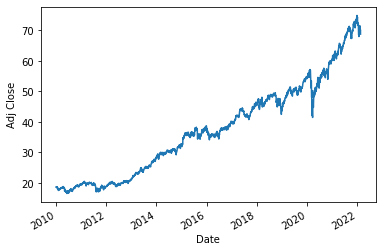

In [3]:
msci["Adj Close"].plot()
plt.ylabel("Adj Close")
plt.show()

## 2.2. Gather information about the data frame by looking at key statistics, i.e. the moments, data types, statistics...

The first moment (mean), the second central moment (Variance), standard deviation, median, data types are collected in the data frame shown below.

In [4]:
msci_info = pd.concat([msci.describe(), 
                       pd.DataFrame(msci.dtypes, columns=["data types"]).T,
                       pd.DataFrame(np.var(msci), columns=["variance"]).T,
                       pd.DataFrame(msci.median(), columns=["median"]).T], axis = 0)

msci_info

,Open,High,Low,Close,Adj Close,Volume
count,3045.0,3045.0,3045.0,3045.0,3045.0,3045.0
mean,40.60438,40.728038,40.456714,40.598418,37.56952,22654.892611
std,14.314955,14.367626,14.251583,14.312746,15.381876,52008.171094
min,20.440882,20.440882,19.539078,20.340681,16.512697,0.0
25%,25.020041,25.03006,24.9499,25.020041,21.508539,4092.0
50%,40.551102,40.671345,40.38076,40.470943,36.415199,8583.0
75%,50.961926,51.162327,50.811623,51.012024,48.617439,20459.0
max,75.320641,75.430862,75.240479,75.430862,74.924858,983529.0
data types,float64,float64,float64,float64,float64,int64
variance,204.850637,206.36088,203.040906,204.78742,236.52441,2703961568.357927


## 2.3. Get all rows where the "High" value is > 40

In [5]:
msci[msci["High"] > 40]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-02-13,39.939880,40.020039,39.859718,40.010021,35.659195,30539
2015-02-18,40.060120,40.110222,39.979961,40.030060,35.677055,10479
2015-02-19,40.340679,40.420841,40.260521,40.260521,35.882458,23253
2015-02-20,40.270542,40.751503,40.210423,40.721443,36.293255,27545
2015-02-23,40.731464,40.781563,40.661324,40.741482,36.311119,37325
...,...,...,...,...,...,...
2022-02-14,69.660004,69.660004,68.800003,69.150002,69.150002,24800
2022-02-15,69.910004,70.300003,69.910004,70.250000,70.250000,2400
2022-02-16,69.699997,70.269997,69.669998,70.269997,70.269997,55000


## 2.4. Drop the volume column

In [6]:
del msci["Volume"]
msci

,Open,High,Low,Close,Adj Close
Date,,,,,
2010-01-04,22.665331,22.945892,22.665331,22.935871,18.619488
2010-01-05,22.905811,22.945892,22.865730,22.945892,18.627628
2010-01-06,22.865730,22.905811,22.775551,22.845692,18.546288
2010-01-07,22.775551,22.905811,22.755510,22.905811,18.595089
2010-01-08,22.875751,22.945892,22.835670,22.945892,18.627628
...,...,...,...,...,...
2022-02-14,69.660004,69.660004,68.800003,69.150002,69.150002
2022-02-15,69.910004,70.300003,69.910004,70.250000,70.250000
2022-02-16,69.699997,70.269997,69.669998,70.269997,70.269997


## 2.5. Get the adjusted close price of the 01/17/2022

In [7]:
msci.loc[pd.to_datetime("2022-01-17"), "Adj Close"]

72.19999694824219

## 2.6. Create a new column that stores the daily return

In [8]:
msci = msci.copy()
msci["daily return"] = (msci["Adj Close"] - msci["Open"]) / msci["Open"]
msci

,Open,High,Low,Close,Adj Close,daily return
Date,,,,,,
2010-01-04,22.665331,22.945892,22.665331,22.935871,18.619488,-0.178504
2010-01-05,22.905811,22.945892,22.865730,22.945892,18.627628,-0.186773
2010-01-06,22.865730,22.905811,22.775551,22.845692,18.546288,-0.188905
2010-01-07,22.775551,22.905811,22.755510,22.905811,18.595089,-0.183550
2010-01-08,22.875751,22.945892,22.835670,22.945892,18.627628,-0.185704
...,...,...,...,...,...,...
2022-02-14,69.660004,69.660004,68.800003,69.150002,69.150002,-0.007321
2022-02-15,69.910004,70.300003,69.910004,70.250000,70.250000,0.004863
2022-02-16,69.699997,70.269997,69.669998,70.269997,70.269997,0.008178


## 2.7. How are the returns distributed?

From the histogram below, we can observe an approximate bell-shaped distribution whose mean is round -0.05.

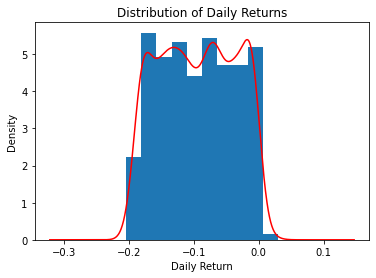

In [9]:
plt.hist(x = msci["daily return"], density = True)
plt.xlabel("Daily Return")
plt.title("Distribution of Daily Returns")
msci["daily return"].plot.density(color = "red")
plt.show()

In [10]:
# Check if the mean is around -0.05.
np.nanmean(msci["daily return"])

-0.09427722134211995

## 2.8. Calculate the cumulative return (Hint: cumsum())

In [11]:
msci["daily return"].cumsum()

Date
2010-01-04     -0.178504
2010-01-05     -0.365276
2010-01-06     -0.554181
2010-01-07     -0.737731
2010-01-08     -0.923436
                 ...    
2022-02-14   -287.071893
2022-02-15   -287.067029
2022-02-16   -287.058851
2022-02-17   -287.071457
2022-02-18   -287.074139
Name: daily return, Length: 3045, dtype: float64

## 2.9. Add a 10-day exponential moving-average "EMA 10" column to the MSCI data frame based on the "Adj Close" column (Hint: you can use pandas_ta using pip install pandas_ta)

In [12]:
msci["EMA_10"] = msci.ta.ema(signal = 10)

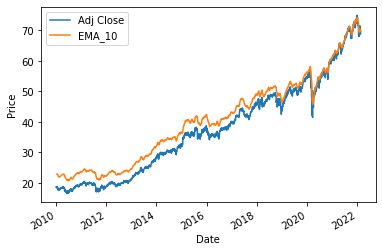

In [13]:
msci["Adj Close"].plot(), msci.ta.ema(window = 10).plot()
plt.ylabel("Price")
plt.legend()
plt.show()

# 3. Linear Regression using Scikit-Learn

## 3.1 Handle Missing Values
Adding the EMA has created missing values for the first n indexes, where n is
your window size (9, in our case).

### 3.1.1 Find and print out the number of missing values grouped by column.

In [14]:
msci.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
daily return    0
EMA_10          9
dtype: int64

There are 9 missing values in the column "EMA_10" and no missing value exists in other columns.

### 3.1.2 Replace missing values

Often times, if statistically reasonable (esp. in time series), we can replace missing values with their mean or mode. This can especially be done if the missing values make up only a little percentage of the data set. Another approach would be to drop the missing entries, which will however often times decrease our performance. Try filling the missing rows of the explanatory variable with "reasonable" values (Hint: Look at the distribution of the beginning of the EMA 10 time series). Make sure there are no missing values left.

In [15]:
# Get the number of rows in our data frame.
msci.shape[0]

3045

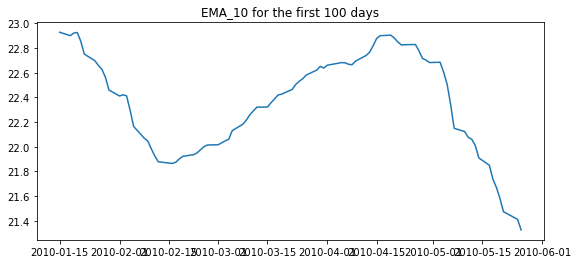

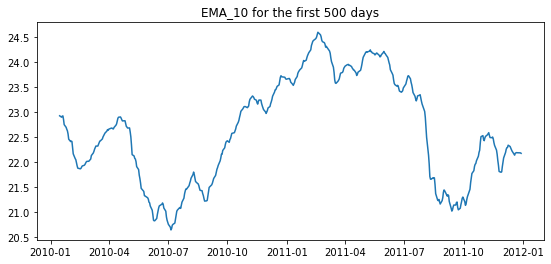

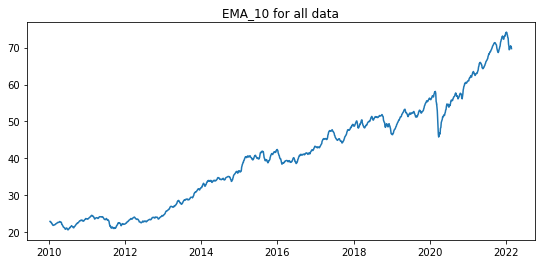

In [16]:
plt.figure()
plt.plot(msci["EMA_10"][0:100])
plt.subplots_adjust(right=1.3)
plt.title("EMA_10 for the first 100 days")

plt.figure()
plt.plot(msci["EMA_10"][0:500])
plt.subplots_adjust(right=1.3)
plt.title("EMA_10 for the first 500 days")

plt.figure()
plt.plot(msci["EMA_10"])
plt.subplots_adjust(right=1.3)
plt.title("EMA_10 for all data")

plt.show()

From the above we can see that, EMA_10 just slightly changed from 2015-03 to 2015-04, compared to both the first 500-days variation of EMA_10 and certainly, the total variation of EMA_10 over the time scale (from 2015 to 2022). Besides, EMA_10 is a weighted average statistic for the past 10 days, hence, the short-term data reflects more information than long-term data, so it is reasonable to replace the first 9 missing values by the average EMA_10 from 2015-03 to 2015-04.

In [17]:
msci["EMA_10"].fillna(np.nanmean(msci[msci.index < pd.to_datetime("2015-04-01")]["EMA_10"]), inplace = True)
msci["EMA_10"]

Date
2010-01-04    26.908371
2010-01-05    26.908371
2010-01-06    26.908371
2010-01-07    26.908371
2010-01-08    26.908371
                ...    
2022-02-14    70.104130
2022-02-15    70.130652
2022-02-16    70.155987
2022-02-17    69.933080
2022-02-18    69.726156
Name: EMA_10, Length: 3045, dtype: float64

In [18]:
# Check if there is any missign value.
msci.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
daily return    0
EMA_10          0
dtype: int64

## 3.2 Write the function split_data
The function split_data takes explanatory and response time series as parameter to and splits it into X_train, X_test, y_train and y_test. In the context of linear regression, y denotes the response variable (=label) and X (=features) the explanatory variable. Other than the series, it takes the size of your train split as parameter. 

Also, be sure to add docstring documentation as learnt in the Python Refresher. Furthermore, print out useful information in the function, like the shape of the initial time series as well as the subsets created.

For example: the first 80% of the time series as train, the last 20% as test.

In [19]:
def split_data(X: pd.Series, y: pd.Series, size: float) -> tuple:
    """
    Input: X: pd.Series, y: pd.Series, size: float
    X: The explanatory variable.
    y: The response variable.
    size: The proportion of training data in the time series,
    
    Output: A tuple with length of 4.
    tuple[0]: X_train
    tuple[1]: X_test
    tuple[2]: y_train
    tuple[3]: y_test
    
    Notice: X and y should have identical length and time scale.
    """
    if len(X) != len(y):
        raise Exception("The inputs X and y should have identical length!")
    elif sum(~(X.index == y.index)) > 0:
        raise Exception("The inputs X and y should have identical time scale!")
        
    time_quantile = np.quantile(X.index, q = size)
    X_train, X_test = X[X.index < time_quantile].values, X[X.index >= time_quantile].values
    y_train, y_test = y[y.index < time_quantile].values, y[y.index >= time_quantile].values

    print(f"The length of the initial time series is {len(X)}.")
    print(f"The first {size*100}% of the time series as train, the last {round((1-size)*100)}% as test.")
    print(f"""
    X_train: {X_train}
    X_test: {X_test}
    y_train: {y_train}
    y_test: {y_test}
    """)
    return X_train, X_test, y_train, y_test

## 3.3 Run a linear regression model on the EMA and the Adj Close

### 3.3.1. Split the data into train and test using your custom function using 20% test size.

In [20]:
print(split_data.__doc__)


    Input: X: pd.Series, y: pd.Series, size: float
    X: The explanatory variable.
    y: The response variable.
    size: The proportion of training data in the time series,
    
    Output: A tuple with length of 4.
    tuple[0]: X_train
    tuple[1]: X_test
    tuple[2]: y_train
    tuple[3]: y_test
    
    Notice: X and y should have identical length and time scale.
    


In [21]:
X_train, X_test, y_train, y_test = split_data(X = msci["EMA_10"], y = msci["Adj Close"], size = 0.8)
print(split_data(X = msci["EMA_10"], y = msci["Adj Close"], size = 0.8))

The length of the initial time series is 3045.
The first 80.0% of the time series as train, the last 20% as test.

    X_train: [26.90837053 26.90837053 26.90837053 ... 52.56427553 52.66645293
 52.77555838]
    X_test: [52.89215427 52.98390683 53.03347135 53.0539845  52.9851419  52.97618357
 52.97067608 52.90240554 52.88298443 52.75049787 52.5255032  52.42157662
 52.43856813 52.44518281 52.29573961 52.26638145 52.27515366 52.36249158
 52.50135697 52.60222123 52.66835027 52.68601924 52.72780347 52.74377227
 52.76959053 52.80893287 52.86480577 52.95424333 53.04928189 53.20902272
 53.29417435 53.45857876 53.64410228 53.79771629 53.93068725 54.06498743
 54.22588091 54.34294611 54.46423249 54.56528815 54.64797005 54.7666304
 54.85096326 54.97097369 55.04365899 55.07397963 55.12793657 55.25042108
 55.35245773 55.47420089 55.55741267 55.59270182 55.56691986 55.46566556
 55.39739536 55.33242911 55.4286647  55.44181717 55.45622166 55.46254173
 55.54969471 55.65015083 55.78153168 55.87627222 55.

### 3.3.2. Train the model using scikit-learn

In [22]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

### 3.3.3. Retrieve and present statistical measures and key numbers i.e. $R^{2}$, intercept and coefficient.

In [23]:
lr.coef_

array([1.04451766])

The coefficient(estimated slope) of our simple linear regression model is 1.17302994.

In [24]:
lr.intercept_

-5.096331731718404

The estimated intercept of our simple linear regression model is -10.923472656011356.

Hence, our fitted model is:

$$
\hat{Y} = 1.17302994 X - 10.923472656011356
$$

In [25]:
r2_score(y_train, lr.predict(X_train.reshape(-1, 1)))

0.9965251152084127

The $R^{2}$ of our simple linear regression model is 0.9845781871086455.

In [26]:
mean_squared_error(y_train, lr.predict(X_train.reshape(-1, 1)))

0.4198452240366453

The $MSE = \frac{SSE}{n-2} = \frac{\Vert Y-\hat{Y} \Vert^{2}}{n-2}$ (Mean Squared Error) of our simple linear regression model is 0.5708204284208702.

## 3.4. Visualize the results in one plot using Matplotlib.Pyplot

Create a combined plot that shows
1. the actual output
2. the predicted output
3. the training data

Make sure to add a legend and labels to each line and that every series is at the "correct" x coordinates.

In [27]:
y_predict = lr.predict(X_test.reshape(-1, 1))

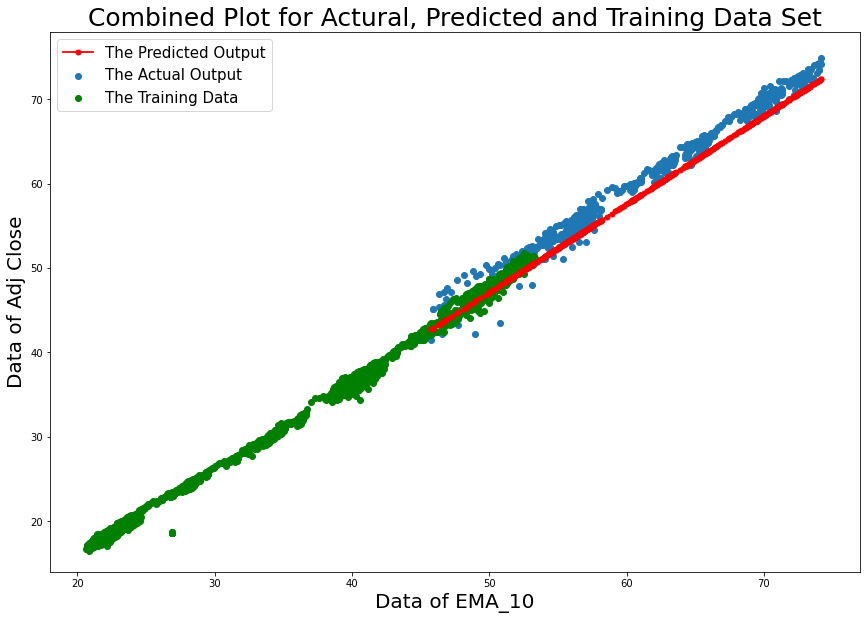

In [28]:
plt.figure()

plt.subplots_adjust(top = 2, right = 2)
plt.xlim(round(min(msci["EMA_10"]) - 3), round(max(msci["EMA_10"]) + 3))
plt.ylim(round(min(msci["Adj Close"]) - 3), round(max(msci["Adj Close"]) + 3))

plt.scatter(X_test, y_test, label = "The Actual Output")
plt.plot(X_test, y_predict, label = "The Predicted Output", color = "red", 
         marker=".", linewidth=1.8, markersize=10)
plt.scatter(X_train, y_train, label = "The Training Data", color = "green")
plt.xlabel("Data of EMA_10", fontsize = 20)
plt.ylabel("Data of Adj Close", fontsize = 20)
plt.title("Combined Plot for Actural, Predicted and Training Data Set", fontsize=25)

plt.legend(fontsize = 15)
plt.show()

Also create subplots for each data set.

[Text(0.5, 0, 'Train Data of EMA_10'), Text(0, 0.5, 'Train Data of Adj Close')]

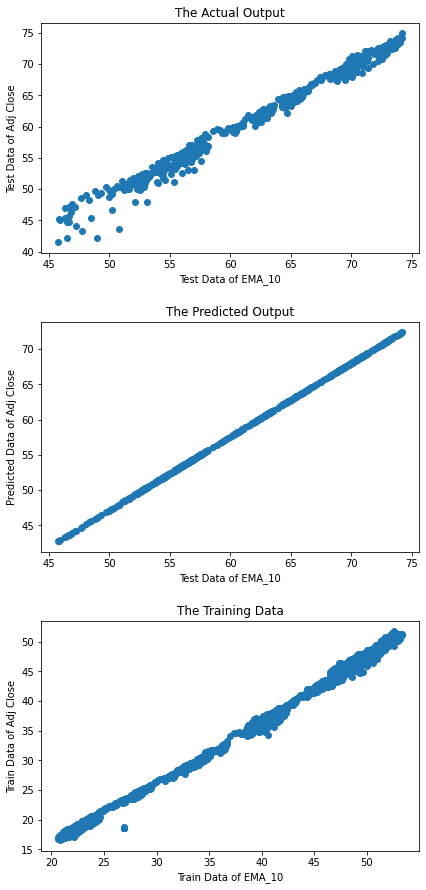

In [29]:
fig, axs = plt.subplots(3)
plt.subplots_adjust(top = 3, right=1, hspace = 0.3)

axs[0].scatter(X_test, y_test)
axs[0].set_title("The Actual Output")
axs.flat[0].set(xlabel = "Test Data of EMA_10", 
                ylabel = "Test Data of Adj Close")

axs[1].scatter(X_test, y_predict)
axs[1].set_title("The Predicted Output")
axs.flat[1].set(xlabel = "Test Data of EMA_10", 
                ylabel = "Predicted Data of Adj Close")


axs[2].scatter(X_train, y_train)
axs[2].set_title("The Training Data")
axs.flat[2].set(xlabel = "Train Data of EMA_10", 
                ylabel = "Train Data of Adj Close")

# 4 Optional: Basic Data Structures in Python

## 4.1. Create an empty dictionary

In [30]:
dic = {}

## 4.2. Update the new dictionary with any key values

In [31]:
dic["x"] = 1
dic

{'x': 1}

## 4.3. List comprehension: iterate through the following dictionaries values and return all values as string

new_dict = {0: 1, 1 : "a", 2: 0.34, 3 : True}

In [32]:
new_dict = {0: 1, 1 : "a", 2: 0.34, 3 : True}
for value in new_dict.values():
    print(str(value), type(str(value)))

1 <class 'str'>
a <class 'str'>
0.34 <class 'str'>
True <class 'str'>


## 4.4. Convert the two lists to sets and then return the union of the two
L1 = ["A", "B", "C", "D"]

L2 = ["B", "D", "E", "F"]

In [33]:
L1, L2 = ["A", "B", "C", "D"], ["B", "D", "E", "F"]
set(L1) | set(L2)

{'A', 'B', 'C', 'D', 'E', 'F'}

Or alternatively:

In [34]:
set(L1 + L2)

{'A', 'B', 'C', 'D', 'E', 'F'}

## 4.5. Iterate through the first list and check if it is in the second by element-wise comparison

In [35]:
for i in L1:
    for j in L2:
        if i == j:
            print(f"Element {i} is ALSO in L2!")
            break
    else: print(f"Element {i} is NOT in L2!")

Element A is NOT in L2!
Element B is ALSO in L2!
Element C is NOT in L2!
Element D is ALSO in L2!
